In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [31]:
train_dataset = datasets.FashionMNIST(root='/dataset', train=True, transform=transforms.ToTensor(), download=True)

In [32]:
test_dataset = datasets.FashionMNIST(root='/dataset', train=False, transform=transforms.ToTensor())

In [33]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [34]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [35]:
len(train_dataset)

60000

In [36]:
batch_size = 64

In [37]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [38]:
len(list(train_loader))

938

In [39]:
len(list(test_loader))

157

In [40]:
class LogisticRegression(nn.Module):
    def __init__(self, in_dim, n_class):
        super().__init__()
        self.linear = nn.Linear(in_dim, n_class)

    def forward(self, x):
        out = self.linear(x)
        return out

In [41]:
model = LogisticRegression(28*28, 10)


In [42]:
model

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [43]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [44]:
device

'cuda'

In [45]:
model = model.to(device)

In [46]:
learning_rate = 1e-3

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [48]:
num_epochs = 10

In [49]:
for epoch in range(num_epochs):
    print('*' * 10)
    print(f'epoch {epoch + 1}')
    running_loss = 0
    running_acc = 0.0
    model.train()
    for i, data in enumerate(train_loader, 1):
        img, label = data
        img = img.view(img.size(0), -1)
        img = img.to(device)
        label = label.to(device)
        out = model(img)
        loss = criterion(out, label)
        running_loss += loss.item()
        _, pred = torch.max(out, 1)
        running_acc += (pred == label).float().mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 300 == 0:
            print(f'[{epoch+1}/{num_epochs}] loss: {running_loss/i:.6f},acc: {running_acc/i:.6f}')
    print(f'Finish {epoch+1} epoch ,loss: {running_loss/i:.6f},acc: {running_acc/i:.6f}')
        

**********
epoch 1
[1/10] loss: 2.036225,acc: 0.406458
[1/10] loss: 1.852183,acc: 0.508906
[1/10] loss: 1.717267,acc: 0.554479
Finish 1 epoch ,loss: 1.702494,acc: 0.558785
**********
epoch 2
[2/10] loss: 1.290826,acc: 0.660365
[2/10] loss: 1.244469,acc: 0.663568
[2/10] loss: 1.205008,acc: 0.666215
Finish 2 epoch ,loss: 1.200914,acc: 0.666411
**********
epoch 3
[3/10] loss: 1.068237,acc: 0.681198
[3/10] loss: 1.047214,acc: 0.682578
[3/10] loss: 1.026875,acc: 0.687899
Finish 3 epoch ,loss: 1.024818,acc: 0.688433
**********
epoch 4
[4/10] loss: 0.963365,acc: 0.700365
[4/10] loss: 0.948863,acc: 0.703281
[4/10] loss: 0.933869,acc: 0.709323
Finish 4 epoch ,loss: 0.932277,acc: 0.709222
**********
epoch 5
[5/10] loss: 0.886808,acc: 0.724688
[5/10] loss: 0.882285,acc: 0.724818
[5/10] loss: 0.873849,acc: 0.725903
Finish 5 epoch ,loss: 0.872721,acc: 0.726079
**********
epoch 6
[6/10] loss: 0.840216,acc: 0.737135
[6/10] loss: 0.836971,acc: 0.737682
[6/10] loss: 0.831697,acc: 0.739392
Finish 6 epoc

In [51]:
model.eval()
eval_loss = 0
eval_acc = 0
for data in test_loader:
    img, label = data
    img = img.view(img.size(0), -1)
    img = img.to(device)
    label = label.to(device)
    with torch.no_grad():
        out = model(img)
        loss = criterion(out, label)
        eval_loss += loss.item()
        _, pred = torch.max(out, 1)
        eval_acc += (pred == label).float().mean()
print(f'Test Loss: {eval_loss/len(test_loader):.6f}, Acc: {eval_acc/len(test_loader):.6f}')

Test Loss: 0.739228, Acc: 0.758360


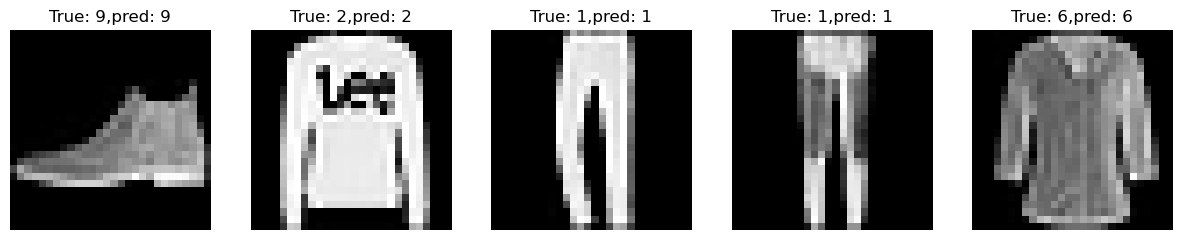

In [53]:
images, labels = next(iter(test_loader))
images = images.reshape(-1, 28*28).to(device)
labels = labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)
fig, ax = plt.subplots(1,5, figsize=(15,3))
for i in range(5):
    ax[i].imshow(images[i].reshape(28,28).cpu(),cmap='gray')
    ax[i].set_title(f'True: {labels[i].item()},pred: {predicted[i].item()}')
    ax[i].axis('off')
plt.show()

In [54]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0234,  0.0136, -0.0309,  ..., -0.0354, -0.0162,  0.0004],
                      [ 0.0109,  0.0171, -0.0170,  ..., -0.0119, -0.0159, -0.0078],
                      [ 0.0132, -0.0023,  0.0134,  ...,  0.0289, -0.0241,  0.0195],
                      ...,
                      [-0.0167,  0.0009,  0.0162,  ..., -0.0231, -0.0163,  0.0328],
                      [ 0.0164,  0.0259, -0.0032,  ..., -0.0196,  0.0278, -0.0287],
                      [-0.0261,  0.0011, -0.0277,  ...,  0.0140,  0.0281,  0.0004]],
                     device='cuda:0')),
             ('linear.bias',
              tensor([-0.0051, -0.0209, -0.0670,  0.0216, -0.0890,  0.3292,  0.0392,  0.0371,
                      -0.0880, -0.1335], device='cuda:0'))])

In [55]:
torch.save(model.state_dict(), './LogisticRegression.pth')